In [27]:
import pandas as pd
import numpy as np
# 数据分隔
from sklearn.model_selection import train_test_split
# 字典特征提取
from sklearn.feature_extraction import DictVectorizer
from xgboost import XGBClassifier
import time

# 读取数据

In [5]:
train_data = pd.read_csv("../data/titanic/train.csv")
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
x = train_data[["Pclass", "Age", "Sex"]]
x

,Pclass,Age,Sex
0,3,22.0,male
1,1,38.0,female
2,3,26.0,female
3,1,35.0,female
4,3,35.0,male
...,...,...,...
886,2,27.0,male
887,1,19.0,female
888,3,NaN,female
889,1,26.0,male


In [8]:
y = train_data[["Survived"]]
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


# 缺失值处理

In [9]:
np.any(x["Pclass"].isnull())

False

In [10]:
np.any(x["Age"].isnull())

True

In [11]:
x["Age"].fillna(x["Age"].mean(), inplace=True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_2260\171992008.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x["Age"].fillna(x["Age"].mean(), inplace=True)


In [12]:
np.any(x["Age"].isnull())

False

In [13]:
np.any(x["Sex"].isnull())

False

# 数据集划分

In [14]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=23)

# 特征工程(字典特征抽取)

In [15]:
# x_train格式不对,
x_train

,Pclass,Age,Sex
151,1,22.000000,female
753,3,23.000000,male
746,3,16.000000,male
684,2,60.000000,male
887,1,19.000000,female
...,...,...,...
31,1,29.699118,female
488,3,30.000000,male
40,3,40.000000,female
742,1,21.000000,female


In [16]:
y_val

,Survived
727,1
668,0
210,0
654,0
228,0
...,...
629,0
430,1
432,1
431,1


In [17]:
# 转换成字典格式
x_train1 = x_train.to_dict(orient="records")
x_val1 = x_val.to_dict(orient="records")
x_train1

[{'Pclass': 1, 'Age': 22.0, 'Sex': 'female'},
 {'Pclass': 3, 'Age': 23.0, 'Sex': 'male'},
 {'Pclass': 3, 'Age': 16.0, 'Sex': 'male'},
 {'Pclass': 2, 'Age': 60.0, 'Sex': 'male'},
 {'Pclass': 1, 'Age': 19.0, 'Sex': 'female'},
 {'Pclass': 3, 'Age': 34.5, 'Sex': 'male'},
 {'Pclass': 3, 'Age': 25.0, 'Sex': 'male'},
 {'Pclass': 2, 'Age': 23.0, 'Sex': 'male'},
 {'Pclass': 2, 'Age': 34.0, 'Sex': 'male'},
 {'Pclass': 3, 'Age': 29.69911764705882, 'Sex': 'male'},
 {'Pclass': 3, 'Age': 29.69911764705882, 'Sex': 'male'},
 {'Pclass': 1, 'Age': 24.0, 'Sex': 'male'},
 {'Pclass': 3, 'Age': 29.69911764705882, 'Sex': 'male'},
 {'Pclass': 3, 'Age': 18.0, 'Sex': 'female'},
 {'Pclass': 1, 'Age': 29.69911764705882, 'Sex': 'male'},
 {'Pclass': 3, 'Age': 4.0, 'Sex': 'female'},
 {'Pclass': 1, 'Age': 64.0, 'Sex': 'male'},
 {'Pclass': 2, 'Age': 57.0, 'Sex': 'male'},
 {'Pclass': 3, 'Age': 20.0, 'Sex': 'male'},
 {'Pclass': 2, 'Age': 32.5, 'Sex': 'male'},
 {'Pclass': 3, 'Age': 29.69911764705882, 'Sex': 'male'},
 {'P

In [48]:
# sparse=False 返回非sparse矩阵
transfer = DictVectorizer(sparse=False)

transfer.fit(x_train1)
x_train2 = transfer.transform(x_train1)
x_val2 = transfer.transform(x_val1)
x_train2, x_val2

(array([[22.,  1.,  1.,  0.],
        [23.,  3.,  0.,  1.],
        [16.,  3.,  0.,  1.],
        ...,
        [40.,  3.,  1.,  0.],
        [21.,  1.,  1.,  0.],
        [36.,  3.,  0.,  1.]]),
 array([[29.69911765,  3.        ,  1.        ,  0.        ],
        [43.        ,  3.        ,  0.        ,  1.        ],
        [24.        ,  3.        ,  0.        ,  1.        ],
        [18.        ,  3.        ,  1.        ,  0.        ],
        [18.        ,  2.        ,  0.        ,  1.        ],
        [29.69911765,  3.        ,  0.        ,  1.        ],
        [ 4.        ,  3.        ,  0.        ,  1.        ],
        [21.        ,  3.        ,  0.        ,  1.        ],
        [29.69911765,  3.        ,  1.        ,  0.        ],
        [36.        ,  3.        ,  0.        ,  1.        ],
        [29.69911765,  2.        ,  0.        ,  1.        ],
        [29.69911765,  3.        ,  0.        ,  1.        ],
        [57.        ,  2.        ,  1.        ,  0.        ],

In [49]:
x_train2.shape, y_train.shape

((712, 4), (712, 1))

# 训练

## 初步训练

In [50]:
xg = XGBClassifier()

In [51]:
xg.fit(x_train2, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [52]:
xg.score(x_val2, y_val)

0.8156424581005587

## 模型调优

In [53]:
scores = []
for i in range(1, 10):
    start = time.time()

    print("max_depth=", i)
    xg = XGBClassifier(eta=1, gamma=0, max_depth=i)
    xg.fit(x_train2, y_train)
    score = xg.score(x_val2, y_val)

    end = time.time()
    print("score = {}, time = {} s.".format(score, int(end-start)))
    print("*" * 50)

    scores.append(score)

max_depth= 1
score = 0.7988826815642458, time = 0 s.
**************************************************
max_depth= 2
score = 0.8044692737430168, time = 0 s.
**************************************************
max_depth= 3
score = 0.8044692737430168, time = 0 s.
**************************************************
max_depth= 4
score = 0.8156424581005587, time = 0 s.
**************************************************
max_depth= 5
score = 0.8156424581005587, time = 0 s.
**************************************************
max_depth= 6
score = 0.8100558659217877, time = 0 s.
**************************************************
max_depth= 7
score = 0.8156424581005587, time = 0 s.
**************************************************
max_depth= 8
score = 0.8100558659217877, time = 0 s.
**************************************************
max_depth= 9
score = 0.7988826815642458, time = 0 s.
**************************************************


## 可视化分数

In [54]:
import matplotlib.pyplot as plt

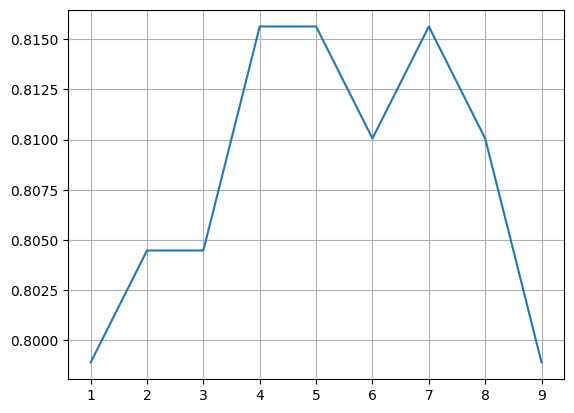

In [55]:
plt.plot(range(1, 10), scores)
plt.grid()
plt.show()

## 选择最好模型

In [56]:
xg = XGBClassifier(eta=1, gamma=0, max_depth=4)
xg.fit(x_train2, y_train)
xg.score(x_val2, y_val)

0.8156424581005587

# Test

## 读取数据

In [57]:
x_test_data = pd.read_csv("../data/titanic/test.csv")
y_test_data = pd.read_csv("../data/titanic/gender_submission.csv")
x_test_data.head(), y_test_data.head()

(   PassengerId  Pclass                                          Name     Sex  \
 0          892       3                              Kelly, Mr. James    male   
 1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
 2          894       2                     Myles, Mr. Thomas Francis    male   
 3          895       3                              Wirz, Mr. Albert    male   
 4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   
 
     Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
 0  34.5      0      0   330911   7.8292   NaN        Q  
 1  47.0      1      0   363272   7.0000   NaN        S  
 2  62.0      0      0   240276   9.6875   NaN        Q  
 3  27.0      0      0   315154   8.6625   NaN        S  
 4  22.0      1      1  3101298  12.2875   NaN        S  ,
    PassengerId  Survived
 0          892         0
 1          893         1
 2          894         0
 3          895         0
 4          896         1)

In [58]:
x_test = x_test_data[["Pclass", "Age", "Sex"]]
y_test = y_test_data["Survived"]
x_test.head(), y_test.head()

(   Pclass   Age     Sex
 0       3  34.5    male
 1       3  47.0  female
 2       2  62.0    male
 3       3  27.0    male
 4       3  22.0  female,
 0    0
 1    1
 2    0
 3    0
 4    1
 Name: Survived, dtype: int64)

## 缺失值处理

In [59]:
np.any(x_test["Pclass"].isnull())

False

In [60]:
np.any(x_test["Age"].isnull())

True

In [61]:
x_test["Age"].fillna(x_test["Age"].mean(), inplace=True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_2260\920843031.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test["Age"].fillna(x_test["Age"].mean(), inplace=True)


In [62]:
np.any(x_test["Age"].isnull())

False

In [63]:
np.any(x_test["Sex"].isnull())

False

## 特征工程(字典特征抽取)

In [64]:
# 转换成字典格式
x_test1 = x_test.to_dict(orient="records")

In [65]:
x_test2 = transfer.fit_transform(x_test1)
x_test2

array([[34.5       ,  3.        ,  0.        ,  1.        ],
       [47.        ,  3.        ,  1.        ,  0.        ],
       [62.        ,  2.        ,  0.        ,  1.        ],
       ...,
       [38.5       ,  3.        ,  0.        ,  1.        ],
       [30.27259036,  3.        ,  0.        ,  1.        ],
       [30.27259036,  3.        ,  0.        ,  1.        ]])

## 评估

In [66]:
xg.score(x_test2, y_test)

0.8133971291866029

In [67]:
xg.predict(x_test2)

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,